In [40]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

Importing the data

In [53]:
namefile = "DRIFT_DATA_TRAIN.csv"
df = pd.read_csv(namefile)
print(df.columns)
df_training = df[:]

Index(['year', 'month', 'day', 'doy', 'x_EASE', 'y_EASE', 'u_buoy', 'v_buoy',
       'id_buoy', 'u_ERA5', 'v_ERA5', 'sic_CDR', 'h_cs2smos', 'h_piomas',
       'd2c'],
      dtype='object')


## Model 1 : only wind velocities

In [82]:
x = np.array(df_training[["u_ERA5","v_ERA5"]])
y = np.array(df_training[["u_buoy","v_buoy"]])

In [83]:
model_1 = linear_model.LinearRegression()
model_1.fit(x,y)
print(model_1.coef_)
print(model_1.score(x,y))

[[ 1.24432643 -0.59077521]
 [ 0.53492028  1.3384401 ]]
0.5568882884896662


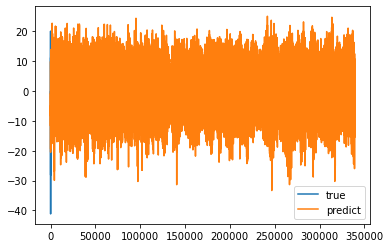

In [84]:
plt.plot(y.T[0][:200],label="true")
plt.plot(model_1.predict(x).T[0][:],label="predict")
plt.legend()

## Model 2 : Adding positions x and y

In [71]:
x = np.array(df_training[["u_ERA5","v_ERA5","x_EASE","y_EASE"]])
y = np.array(df_training[["u_buoy","v_buoy"]])

In [72]:
model_2 = linear_model.LinearRegression()
model_2.fit(x,y)
print("Coefficients :",model_2.coef_)
print("Score of the model :",model_2.score(x,y))

Coefficients : [[ 1.22942399 -0.56602875  0.01060055 -0.01916741]
 [ 0.55787451  1.27699522  0.01890289  0.03360185]]
Score of the model : 0.5741515004293524


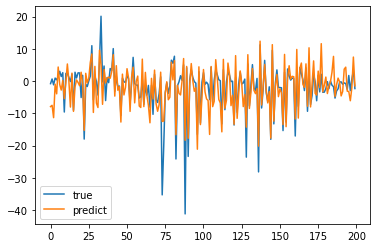

In [73]:
plt.plot(y.T[0][:200],label="true")
plt.plot(model_2.predict(x).T[0][:200],label="predict")
plt.legend()

## Model 3 :Adding the ice concentration

In [68]:
x = np.array(df_training[["u_ERA5","v_ERA5","x_EASE","y_EASE","sic_CDR"]])
y = np.array(df_training[["u_buoy","v_buoy"]])

In [69]:
model_3 = linear_model.LinearRegression()
model_3.fit(x,y)
print(model_3.coef_)
print(model_3.score(x,y))

[[ 1.23147616 -0.56507961  0.00925961 -0.01901963  3.73336931]
 [ 0.5569852   1.27658392  0.01948399  0.03353781 -1.61786535]]
0.5761313274567401


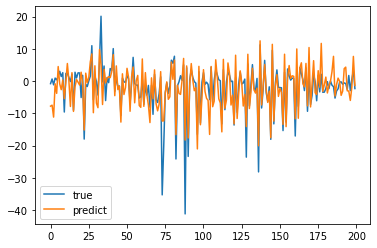

In [70]:
plt.plot(y.T[0][:200],label="true")
plt.plot(model_3.predict(x).T[0][:200],label="predict")
plt.legend()

## Model 4 : Adding the ice thickness

In [74]:
x = np.array(df_training[["u_ERA5","v_ERA5","x_EASE","y_EASE","sic_CDR","h_piomas"]])
y = np.array(df_training[["u_buoy","v_buoy"]])

In [75]:
model_4 = linear_model.LinearRegression()
model_4.fit(x,y)
print(model_4.coef_)
print(model_4.score(x,y))

[[ 1.23089659 -0.56430453  0.01142339 -0.0204184   2.33076775  0.43800807]
 [ 0.55730026  1.27616258  0.01830773  0.03429819 -0.85539765 -0.2381054 ]]
0.5774371207625949


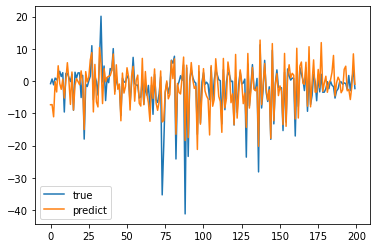

In [77]:
plt.plot(y.T[0][:200],label="true")
plt.plot(model_4.predict(x).T[0][:200],label="predict")
plt.legend()

## Adding the coastal distance

In [37]:
x = np.array(df_training[["u_ERA5","v_ERA5","x_EASE","y_EASE","sic_CDR","h_piomas","d2c"]])
y = np.array(df_training[["u_buoy","v_buoy"]])

In [38]:
model_5 = linear_model.LinearRegression()
model_5.fit(x,y)
print(model_5.coef_)
print(model_5.score(x,y))

[[ 1.22849916e+00 -5.62160099e-01  1.34256396e-02 -2.16725162e-02
   2.53582607e+00  4.29210874e-01 -5.36819627e-04]
 [ 5.62682762e-01  1.27134807e+00  1.38124529e-02  3.71138292e-02
  -1.31577736e+00 -2.18354671e-01  1.20522235e-03]]
0.5781768901041078


In [ ]:
plt.plot(y.T[0][:200],label="true")
plt.plot(model_1.predict(x).T[0][:200],label="predict")
plt.legend()

## Graphics with all models

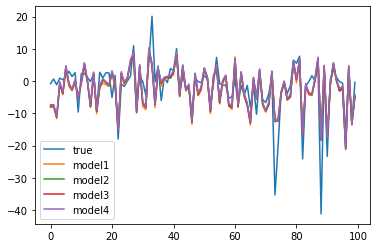

In [80]:
end_step = 100

plt.plot(y.T[0][:end_step],label="true")

x = np.array(df_training[["u_ERA5","v_ERA5"]])
plt.plot(model_1.predict(x).T[0][:end_step],label="model1")

x = np.array(df_training[["u_ERA5","v_ERA5","x_EASE","y_EASE"]])
plt.plot(model_2.predict(x).T[0][:end_step],label="model2")

x = np.array(df_training[["u_ERA5","v_ERA5","x_EASE","y_EASE","sic_CDR"]])
plt.plot(model_3.predict(x).T[0][:end_step],label="model3")

x = np.array(df_training[["u_ERA5","v_ERA5","x_EASE","y_EASE","sic_CDR","h_piomas"]])
plt.plot(model_4.predict(x).T[0][:end_step],label="model4")
plt.legend()